In [6]:
import pandas as pd
import os
import numpy as np
import sys
import pyranges as pr
import gget
import networkx as nx

import cooler
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
%load_ext memory_profiler

In [57]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/2018_hic/references/reference.chrom.sizes"

df = pd.read_csv(fpath, '\t', header=None, names=['chrom', 'len'])
print(df['chrom'].to_list())

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X', 'Y', 'MT', 'HG76_PATCH', 'HG2365_PATCH', 'HSCHR15_4_CTG8', 'HSCHR6_MHC_SSTO_CTG1', 'HSCHR6_MHC_MCF_CTG1', 'HSCHR6_MHC_COX_CTG1', 'HSCHR6_MHC_MANN_CTG1', 'HSCHR6_MHC_APD_CTG1', 'HSCHR6_MHC_QBL_CTG1', 'HSCHR6_MHC_DBB_CTG1', 'HSCHR17_7_CTG4', 'HSCHR16_1_CTG1', 'HSCHR15_6_CTG8', 'HG926_PATCH', 'HSCHR17_1_CTG5', 'HSCHR5_2_CTG1_1', 'HG1343_HG173_HG459_PATCH', 'HSCHR14_7_CTG1', 'HSCHR17_2_CTG5', 'HSCHR14_3_CTG1', 'HG2280_PATCH', 'HSCHR5_1_CTG1_1', 'HSCHR7_2_CTG6', 'HSCHR19LRC_LRC_J_CTG3_1', 'HSCHR19_4_CTG3_1', 'HSCHR19LRC_LRC_S_CTG3_1', 'HSCHR19LRC_LRC_I_CTG3_1', 'HG1815_PATCH', 'HG2265_PATCH', 'HSCHR19LRC_LRC_T_CTG3_1', 'HSCHR19LRC_COX1_CTG3_1', 'HSCHR19LRC_PGF1_CTG3_1', 'HSCHR8_8_CTG1', 'HG2275_PATCH', 'HSCHR1_3_CTG32_1', 'HSCHR6_1_CTG8', 'HG1532_PATCH', 'HSCHR1_5_CTG31', 'HSCHR19LRC_PGF2_CTG3_1', 'HSCHR19LRC_COX2_CTG3_1', 'HG2526_HG2573_PATCH', 'HG1_PATCH', 'HSCH

In [49]:
%%memit 
fpath = "/scratch/indikar_root/indikar1/cstansbu/2018_hic/pairs/T10.final.pairs.gz"

nrow = 10000

cols = [
    'readID',
    'chrom1',
    'pos1',
    'chrom2',
    'pos2',
    'strand1',
    'strand2',
    'pair_type',
    'sam1',
    'sam2',
    'mapq1',
    'mapq2',
    'read_len1',
    'read_len2',
    'algn_read_span1',
    'algn_read_span2',
    'algn_ref_span1',
    'algn_ref_span2'
]

usecols = [
    'readID',
    'chrom1',
    'pos1',
    'chrom2',
    'pos2',
    'strand1',
    'strand2',
    'pair_type',
    'mapq1',
    'mapq2',
    'algn_ref_span1',
    'algn_ref_span2'
]

dtypes = {
    'readID': 'str',
    'chrom1': 'int',
    'pos1': 'int',
    'chrom2': 'int',
    'pos2': 'int',
    'strand1': 'str',
    'strand2': 'str',
    'pair_type': 'str',
    'mapq1': 'str',
    'mapq2': 'str',
    'algn_ref_span1': 'str',
    'algn_ref_span2': 'str',
}

df = pd.read_csv(fpath, 
                 sep="\t", 
                 names=cols,
                 usecols=usecols,
                 dtype=dtypes,
                 na_filter=False,
                 comment="#", 
                 compression='gzip',
                 low_memory=True,
                 header=None, 
                 nrows=nrow)

print(f"{df.shape=}")

print(df.info(memory_usage="deep"))


""" FILTER OUT NON-UNIQUE """
df = df[df['pair_type'] == 'UU'].reset_index()
print(f"{df.shape=}")
print(df.info(memory_usage="deep"))

df.head()

df.shape=(10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   readID          10000 non-null  object
 1   chrom1          10000 non-null  int64 
 2   pos1            10000 non-null  int64 
 3   chrom2          10000 non-null  int64 
 4   pos2            10000 non-null  int64 
 5   strand1         10000 non-null  object
 6   strand2         10000 non-null  object
 7   pair_type       10000 non-null  object
 8   mapq1           10000 non-null  object
 9   mapq2           10000 non-null  object
 10  algn_ref_span1  10000 non-null  object
 11  algn_ref_span2  10000 non-null  object
dtypes: int64(4), object(8)
memory usage: 5.1 MB
None
df.shape=(4571, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          ---------

In [35]:
df.head()

,index,readID,chrom1,pos1,chrom2,pos2,strand1,strand2,pair_type,mapq1,mapq2,algn_ref_span1,algn_ref_span2
0,0,D00442:221:C9WBUANXX:1:2310:19533:88012,1,15248,1,102682,-,+,UU,6,8,126,119
1,1,D00442:221:C9WBUANXX:1:1209:1197:31236,1,33533,1,191467599,-,-,UU,4,60,127,126
2,2,D00442:221:C9WBUANXX:1:2210:17307:78246,1,47202,1,169499453,-,-,UU,6,60,109,126
3,3,D00442:221:C9WBUANXX:1:2305:14295:74524,1,47224,1,61964,-,+,UU,6,44,126,123
4,4,D00442:221:C9WBUANXX:1:1112:10456:21223,1,49290,1,154379508,-,-,UU,8,60,102,126


In [ ]:
"""
df.shape=(10000, 18)
df.shape=(4571, 19)
peak memory: 285.00 MiB, increment: 13.70 MiB
"""

"""
better 
df.shape=(10000, 12)
df.shape=(4571, 13)
peak memory: 280.42 MiB, increment: 3.70 MiB
"""

In [ ]:
break

In [2]:
gfpath = "/nfs/turbo/umms-indikar/shared/projects/myod/data/resources/Homo_sapiens.GRCh38.110.gtf.gz"
gr = pr.read_gtf(gfpath)
gf = gr.as_df()
print(f"{gf.shape=}")
gf.head()

gf.shape=(3421622, 26)


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_version,...,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id
0,1,havana,gene,182695,184174,.,+,.,ENSG00000279928,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,havana,transcript,182695,184174,.,+,.,ENSG00000279928,2,...,havana,unprocessed_pseudogene,Ensembl_canonical,NA,NaN,NaN,NaN,NaN,NaN,NaN
2,1,havana,exon,182695,182746,.,+,.,ENSG00000279928,2,...,havana,unprocessed_pseudogene,Ensembl_canonical,NA,1,ENSE00003759020,2,NaN,NaN,NaN
3,1,havana,exon,183131,183216,.,+,.,ENSG00000279928,2,...,havana,unprocessed_pseudogene,Ensembl_canonical,NA,2,ENSE00003759581,2,NaN,NaN,NaN
4,1,havana,exon,183493,183571,.,+,.,ENSG00000279928,2,...,havana,unprocessed_pseudogene,Ensembl_canonical,NA,3,ENSE00003804405,1,NaN,NaN,NaN


In [3]:
gf.columns

Index(['Chromosome', 'Source', 'Feature', 'Start', 'End', 'Score', 'Strand',
       'Frame', 'gene_id', 'gene_version', 'gene_name', 'gene_source',
       'gene_biotype', 'transcript_id', 'transcript_version',
       'transcript_name', 'transcript_source', 'transcript_biotype', 'tag',
       'transcript_support_level', 'exon_number', 'exon_id', 'exon_version',
       'protein_id', 'protein_version', 'ccds_id'],
      dtype='object')

In [4]:
genes = gf[gf['Feature'] == 'gene'].reset_index(drop=True)
genes = genes[genes['gene_biotype'] == 'protein_coding']

gene_cols = [
    'Chromosome',
    'Start', 
    'End', 
    'Strand',
    'gene_name'
]

genes = genes[gene_cols]

print(genes['gene_name'].nunique())

print(f"{genes.shape=}")

genes.head()

19419
genes.shape=(20070, 5)


,Chromosome,Start,End,Strand,gene_name
2,1,3069167,3438621,+,PRDM16
4,1,10472287,10630758,+,PEX14
7,1,2425979,2505532,+,PLCH2
8,1,9292893,9369532,+,SPSB1
11,1,9943427,9985501,+,NMNAT1


In [5]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/2018_hic/pairs/T10.final.pairs.gz"

nrow = 1000000

cols = [
    'readID',
    'chrom1',
    'pos1',
    'chrom2',
    'pos2',
    'strand1',
    'strand2',
    'pair_type',
    'sam1',
    'sam2',
    'mapq1',
    'mapq2',
    'read_len1',
    'read_len2',
    'algn_read_span1',
    'algn_read_span2',
    'algn_ref_span1',
    'algn_ref_span2'
]

df = pd.read_csv(fpath, 
                 sep="\t", 
                 names=cols,
                 comment="#", 
                 header=None, 
                 nrows=nrow)

print(f"{df.shape=}")


""" FILTER OUT NON-UNIQUE """
df = df[df['pair_type'] == 'UU'].reset_index()
print(f"{df.shape=}")
df.head()


df.shape=(1000000, 18)
df.shape=(464207, 19)


,index,readID,chrom1,pos1,chrom2,pos2,strand1,strand2,pair_type,sam1,sam2,mapq1,mapq2,read_len1,read_len2,algn_read_span1,algn_read_span2,algn_ref_span1,algn_ref_span2
0,0,D00442:221:C9WBUANXX:1:2310:19533:88012,1,15248,1,102682,-,+,UU,D00442:221:C9WBUANXX:1:2310:19533:880128111...,D00442:221:C9WBUANXX:1:2310:19533:880121611...,6.0,8.0,126.0,126.0,126.0,119.0,126.0,119.0
1,1,D00442:221:C9WBUANXX:1:1209:1197:31236,1,33533,1,191467599,-,-,UU,D00442:221:C9WBUANXX:1:1209:1197:3123611313...,D00442:221:C9WBUANXX:1:1209:1197:3123617711...,4.0,60.0,126.0,126.0,126.0,126.0,127.0,126.0
2,2,D00442:221:C9WBUANXX:1:2210:17307:78246,1,47202,1,169499453,-,-,UU,D00442:221:C9WBUANXX:1:2210:17307:782461131...,D00442:221:C9WBUANXX:1:2210:17307:782461771...,6.0,60.0,126.0,126.0,109.0,126.0,109.0,126.0
3,3,D00442:221:C9WBUANXX:1:2305:14295:74524,1,47224,1,61964,-,+,UU,D00442:221:C9WBUANXX:1:2305:14295:745241451...,D00442:221:C9WBUANXX:1:2305:14295:745249716...,6.0,44.0,126.0,126.0,126.0,123.0,126.0,123.0
4,4,D00442:221:C9WBUANXX:1:1112:10456:21223,1,49290,1,154379508,-,-,UU,D00442:221:C9WBUANXX:1:1112:10456:212231771...,D00442:221:C9WBUANXX:1:1112:10456:212231131...,8.0,60.0,126.0,126.0,102.0,126.0,102.0,126.0


In [6]:
# break

In [7]:
def makePyRanges(df, frag=1):
    """A function to produce a PyRanges frame from a pairs 
    dataframe """

    cols = [
        'readID', 
        f'chrom{frag}', 
        f'pos{frag}',
        f'strand{frag}',
        f'algn_ref_span{frag}',
        f'mapq{frag}'
    ]

    prdf = df[cols].copy()
    prdf.columns = ['readID', 'Chromosome', 'Start', 'Strand', 'Span', 'MAPQ']
    prdf['End'] = prdf['Start'] + prdf['Span']
    prdf = prdf[prdf['End'].notna()]
    
    prdf['Start'] = prdf['Start'].astype(int)
    prdf['End'] = prdf['End'].astype(int)

    prdf = prdf[['readID', 'Chromosome', 'Start', 'End', 'Strand', 'MAPQ']]
    prdf['Fragment'] = frag
    return pr.PyRanges(prdf)
        

p1 = makePyRanges(df, frag=1)
print(p1.head())

print()
p2 = makePyRanges(df, frag=2)
print(p2.head())

+-----------------------------------------+--------------+-----------+-------+
| readID                                  |   Chromosome |     Start | +4    |
| (object)                                |   (category) |   (int32) | ...   |
|-----------------------------------------+--------------+-----------+-------|
| D00442:221:C9WBUANXX:1:1108:7583:85473  |            1 |     54313 | ...   |
| D00442:221:C9WBUANXX:1:1201:2529:71445  |            1 |     54458 | ...   |
| D00442:221:C9WBUANXX:1:2304:10558:22672 |            1 |     57002 | ...   |
| D00442:221:C9WBUANXX:1:2201:11202:23443 |            1 |     61826 | ...   |
| D00442:221:C9WBUANXX:1:1112:7884:95449  |            1 |     61904 | ...   |
| D00442:221:C9WBUANXX:1:2116:18720:7605  |            1 |     64107 | ...   |
| D00442:221:C9WBUANXX:1:1205:3655:44579  |            1 |     79143 | ...   |
| D00442:221:C9WBUANXX:1:1115:20132:97030 |            1 |     79390 | ...   |
+-----------------------------------------+---------

In [8]:
def getGeneHits(prdf, gr, slack=300):
    """A function to get contact hits. Returns a list of readID """
    prdf = prdf.join(gr, 
            slack=slack)
    
    prdf = prdf.as_df() # convert back to df
    prdf = prdf[prdf['gene_name'] != "-1"] # drop contacts not in gene regions
    return prdf

    
gr = pr.PyRanges(genes)

p1_reads = getGeneHits(p1, gr, slack=300)
p2_reads = getGeneHits(p2, gr, slack=300)
print(f"{len(p1_reads)=}")
print(f"{len(p2_reads)=}")

# filter for common
shared = np.intersect1d(p1_reads['readID'], p2_reads['readID'])
p1_reads = p1_reads[p1_reads['readID'].isin(shared)]
p2_reads = p2_reads[p2_reads['readID'].isin(shared)]
print(f"{len(p1_reads)=}")
print(f"{len(p2_reads)=}")

cols = [
    'readID', 
    'Chromosome', 
    'Start_b', 
    'End_b', 
    # 'Strand', 
    'Fragment',
    'gene_name',
    'MAPQ',
    # 'Overlap'
]

print(p1_reads.columns)


## join

gx = pd.merge(p1_reads[cols], p2_reads[cols], 
              how='left',
              left_on='readID',
              right_on='readID',
              suffixes=['_1', '_2'])

gx.head()

len(p1_reads)=292318
len(p2_reads)=289619
len(p1_reads)=216292
len(p2_reads)=218645
Index(['readID', 'Chromosome', 'Start', 'End', 'Strand', 'MAPQ', 'Fragment',
       'Start_b', 'End_b', 'Strand_b', 'gene_name'],
      dtype='object')


,readID,Chromosome_1,Start_b_1,End_b_1,Fragment_1,gene_name_1,MAPQ_1,Chromosome_2,Start_b_2,End_b_2,Fragment_2,gene_name_2,MAPQ_2
0,D00442:221:C9WBUANXX:1:1210:2771:65982,1,923922,944575,1,SAMD11,60.0,1,1541672,1574863,2,SSU72,60.0
1,D00442:221:C9WBUANXX:1:1209:3096:69997,1,923922,944575,1,SAMD11,60.0,1,1001137,1014540,2,ISG15,60.0
2,D00442:221:C9WBUANXX:1:2303:15535:8334,1,923922,944575,1,SAMD11,60.0,1,1001137,1014540,2,ISG15,60.0
3,D00442:221:C9WBUANXX:1:2304:11531:15395,1,923922,944575,1,SAMD11,60.0,1,923922,944575,2,SAMD11,60.0
4,D00442:221:C9WBUANXX:1:1114:13956:4198,1,923922,944575,1,SAMD11,60.0,1,37489992,37514766,2,MEAF6,60.0


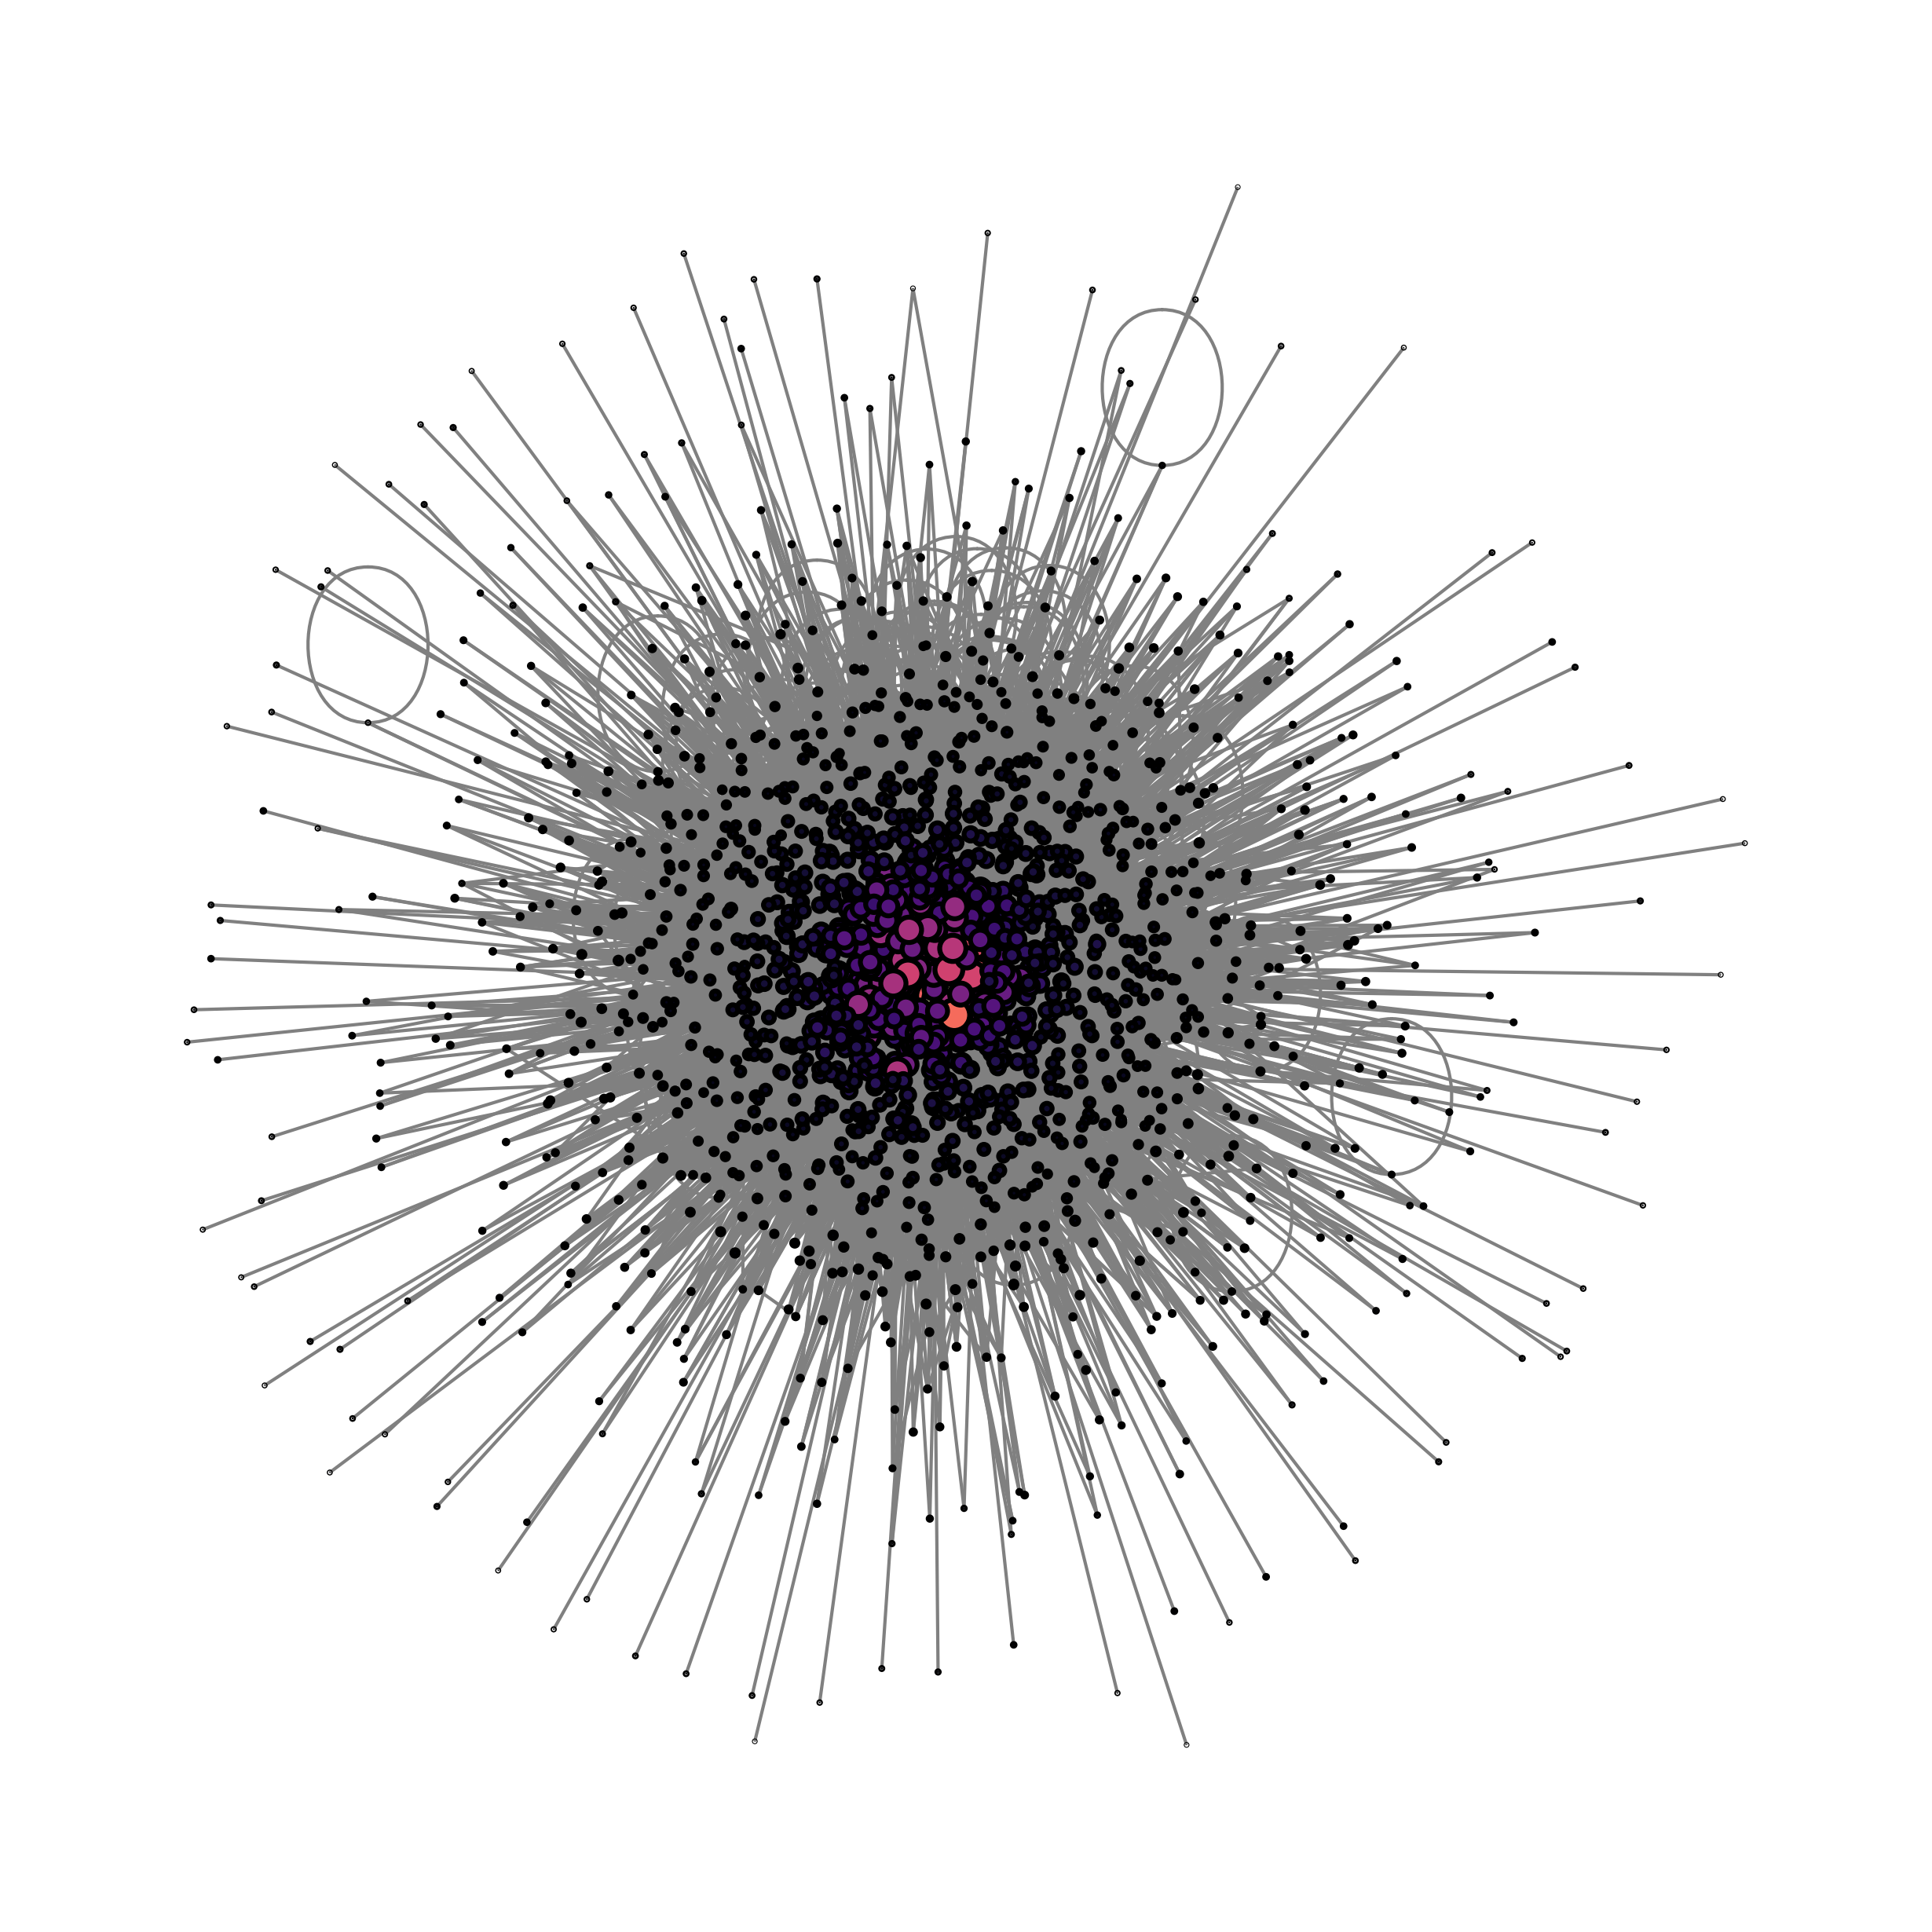

In [9]:

pdf = gx.groupby(['gene_name_1', 'gene_name_2'])['readID'].count().reset_index()

G = nx.from_pandas_edgelist(pdf, 
                            source='gene_name_1', 
                            target='gene_name_2', 
                            create_using=nx.Graph(),
                            edge_attr=True)


evec = nx.eigenvector_centrality(G, max_iter=100,)
node_attrs = np.array([evec[n] for n in G.nodes()])


plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.figsize'] = 8, 8

nx.draw(G,
        node_size=node_attrs*1000,
        node_color=node_attrs,
        cmap='magma',
        edge_color='grey',
        edgecolors='k',
        linewidths=1.5)

In [10]:
cdf = pd.DataFrame.from_dict(evec, orient='index', columns=['cent'])
cdf = cdf.reset_index(drop=False)
cdf = cdf.sort_values(by='cent', ascending=False)
cdf.head(20)

,index,cent
216,CAMTA1,0.127973
26,MACF1,0.120122
68,KAZN,0.118002
178,RERE,0.117411
11,CSMD2,0.113082
21,HIVEP3,0.111926
260,EIF4G3,0.103602
449,VPS13D,0.102547
264,EPB41,0.095789
529,PRDM16,0.088320


In [16]:
n_gene = 300
genes = cdf['index'].head(n_gene).to_list()

# db = 'GO_Biological_Process_2023'
db = 'GO_Biological_Process_2021'
# db = 'KEGG_2021_Human'
db = 'TRANSFAC_and_JASPAR_PWMs'

enrich = gget.enrichr(genes, database=db)
pd.set_option('display.max_colwidth', 100)
enrich[['path_name', 'adj_p_val', 'overlapping_genes']].head(20)

Thu Oct 12 15:48:05 2023 INFO Performing Enichr analysis using database GO_Biological_Process_2021.


,path_name,adj_p_val,overlapping_genes
0,mRNA catabolic process (GO:0006402),0.007383,"[EXOSC10, YTHDF2, AGO3, AGO4, THRAP3, TUT4, AGO1]"
1,mRNA cleavage involved in gene silencing by miRNA (GO:0035279),0.027205,"[AGO3, AGO4, AGO1]"
2,pre-miRNA processing (GO:0031054),0.027205,"[AGO3, AGO4, TUT4, AGO1]"
3,production of miRNAs involved in gene silencing by miRNA (GO:0035196),0.027205,"[AGO3, AGO4, TUT4, AGO1, PUM1]"
4,primary neural tube formation (GO:0014020),0.027205,"[SKI, STIL, MTHFR, GRHL3, PHACTR4]"
5,tube closure (GO:0060606),0.027205,"[SKI, STIL, MTHFR, GRHL3, PHACTR4]"
6,pyrimidine ribonucleotide biosynthetic process (GO:0009220),0.027205,"[CMPK1, CTPS1, AK5]"
7,miRNA loading onto RISC involved in gene silencing by miRNA (GO:0035280),0.027205,"[AGO3, AGO4, AGO1]"
8,neural tube closure (GO:0001843),0.030928,"[SKI, STIL, MTHFR, GRHL3, PHACTR4]"
9,RNA secondary structure unwinding (GO:0010501),0.034436,"[AGO3, AGO4, AGO1]"


In [11]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
np.isinf(node_attrs).sum()


In [ ]:
break

In [ ]:
# shared[:10]

In [ ]:
p1_reads.head()

In [ ]:
def filterGenexGene(df, p1_reads, p2_reads):
    """A function to return only geneXgene contacts """
    fdf = df[df['readID'].isin(p1_reads) & df['readID'].isin(p2_reads)]
    return fdf

test = filterGenexGene(df, p1_reads, p2_reads)  
test.shape

In [ ]:
test.head()

In [ ]:
p1 = df.copy()






# p_cols = [
#     'chrom1', 
#     'pos1', 
#     'chrom2', 
#     'pos2', 
#     'strand1', 
#     'strand2',
#     'mapq1', 
#     'mapq2',
#     'algn_ref_span1',
#     'algn_ref_span2'
# ]

# pairs = pairs[p_cols]

# pairs['Start1'] = pairs['pos1']
# pairs['End1'] = pairs['pos1'] + pairs['algn_ref_span1']

# pairs['Start2'] = pairs['pos2']
# pairs['End2'] = pairs['pos2'] + pairs['algn_ref_span2']


# pairs.head()

In [ ]:
break

In [ ]:
gr = pr.PyRanges(genes)


# pairs_pr = pr.PyRanges(pairs)


# test = 

In [ ]:
# t = clr.matrix(balance=False).fetch('4')
# t = np.log1p(t)

# mask = (np.sum(t, axis=1) < 400)
# t = t[~mask, :][:, ~mask]

# A = np.fill_diagonal(t, 0)

# plt.matshow(A)

In [ ]:
np.sum(t, axis=1)

In [ ]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/2018_hic/pairs/T10.pairs.stats"

res = []
for line in open(fpath):
    if line.startswith('dist_freq'):

        line_str = line.replace('dist_freq/', '')
        meta, count = line_str.split("\t")

        count = int(count)
        contact_type = meta.split("/")[1]

        dist = meta.split("/")[0].split("-")
        if not len(dist) == 2:
            continue
        else:
            dist = list(map(int, dist))

        row = {
            'dist' : np.mean(dist),
            'dist_lb' : dist[0],
            'dist_ub' : dist[1],
            'count' : count,
            'contact_type' : contact_type,
        }
        res.append(row)

df = pd.DataFrame(res)
df.head()

In [ ]:
gx = df.groupby('dist')['count'].sum().reset_index(drop=False)

sns.scatterplot(data=gx, 
                x='dist',
                y='count')

plt.xscale('log')